<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/e/e1/CC_BY_icon.svg"><br />

Created by Lorenzo Babini and under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
taking inspiration from https://github.com/wjbmattingly/tap-2023-spacy-01/blob/main/notebooks/day-03.ipynb and adapting the code for Stanza<br />
For questions/comments/improvements, email lorenzo.babini@unicatt.it.<br />

## Named Entity Recognition Infographic

This notebook contains the code to build a pretty and useful data visualization of extracted data from texts divided into parts or chapters (ex. novels) using a technique called NER. The basic code to run this technique in Python, using spaCy or Stanza, is written here https://github.com/LorenzoBabini/Python-script-for-text-analysis/blob/main/lemma_%26_POS_%26_NER/Spacy_%26_Stanza_POS_NER.ipynb.
For Data visualization in this notebook is achieved using Mathplotlib to achieve an infographic like this:

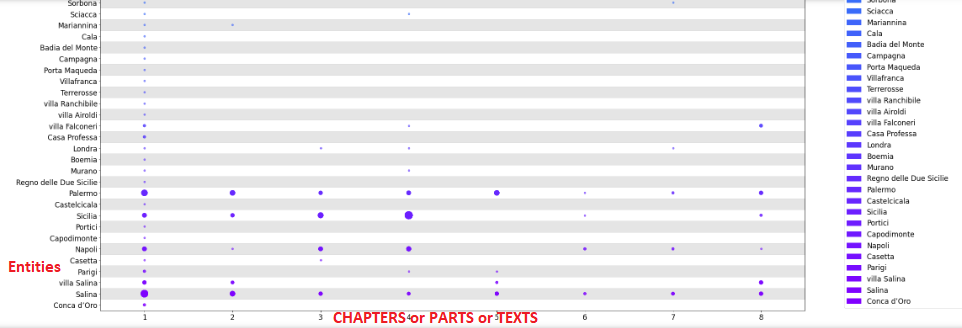

In [ ]:
### Import Libraries ###
import stanza
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [ ]:
nlp_stanza = stanza.Pipeline(lang='it', processors='tokenize,mwt,pos,lemma,ner')

### Text processing

In [ ]:
# open text file
text file = "" # insert text path in the quotation marks
with open(text file, "r", encoding="utf-8") as f:
    text = f.read()
print(text)

###### Segmenting the text chapter by chapter.
To do this, we take advantage of the titling at the beginning of each chapter: "Part" or "Chapter" ecc...

In [ ]:
chapters = text.split("PART")[1:]   # insert in the quotation marks the correct titling written at the beginning of each chapter
len(chapters)

In [ ]:
print(chapters[2][:500])

##### Extracting all the entities from each chapter
In this example, we extract locations (ent.type = LOC), but we could extract people (PERSON) or organisations (ORG) or others
To chage the setting, you could change the list_name (locations) and the ent.type

In [ ]:
locations = []
for i, chapter in enumerate(chapters, 1):
    doc = nlp_stanza(chapter)
    for ent in doc.ents:
        if ent.type == 'LOC':
            locations.append(ent.text)
locations = list(set(locations))
print(len(locations))
print(locations)

Removing some mistaken named entities

In [ ]:
to_remove = {"", "", ""} # insert in the quotation marks different tokens to remove from the list
locations = [ele for ele in locations if ele not in to_remove]
print(locations)

##### Data structuring

Using Defaultdict to create a dictionary of structured data (entities and the number of chapters). </br>
See https://github.com/wjbmattingly/tap-2023-spacy-01/blob/main/notebooks/day-03.ipynb for more infos. </br>
In this case the extracted named entities are only locations (LOC). In other cases, you could change the ent.type. You could change the name of defaultdict (here is location_mention_positions)

In [ ]:
from collections import defaultdict

location_mention_positions = defaultdict(lambda: defaultdict(list))
for chapter_number, chapter_text in enumerate(chapters, 1):
    processed_chapter = nlp_stanza(chapter_text)
    for ent in processed_chapter.ents:
        if ent.type == 'LOC'and ent.text not in to_remove:
            location_mention_positions[ent.text][chapter_number].append((ent.start_char, ent.end_char))

### Data visualization

In [ ]:
# Define the figure size
fig, ax = plt.subplots(figsize=(22, 93)) #22, 25

# Set the global font size
plt.rcParams.update({'font.size': 17})  #17

# Get a list of unique entities and create a color for each entity
entities = list(location_mention_positions.keys())
num_entities = len(entities)
colors = plt.cm.rainbow(np.linspace(0, 1, num_entities))

# Create a numeric representation of the chapters
c = {i: i for i in range(1, 9)}  # assuming chapters numbered from 1 to 12


# Add alternating background colors
for i in range(1, num_entities+1):
    if i % 2 == 0:
        ax.fill_betweenx(y=[i-0.5, i+0.5], x1=0.5, x2=max(c.values())+0.5, color='gray', alpha=0.2)

# For holding patches for creating custom legend
patches = []

for color, (entity, entity_chapters) in zip(colors, location_mention_positions.items()):
    for chapter, positions in entity_chapters.items():
        y = [entities.index(entity)+1] * len(positions) # start y-axis at 1
        x = [c[chapter]] * len(positions)
        size = [20 * len(positions) for _ in positions]
        ax.scatter(x, y, s=size, color=color, alpha=0.6)
    
    # Create patch for each entity
    patches.append(mpatches.Patch(color=color, label=entity))

# Set the y-ticks and y-ticklabels to the entity names
ax.set_yticks(range(1, num_entities+1))
ax.set_yticklabels(entities)

# Set the x-ticks and x-ticklabels to the chapter numbers
ax.set_xticks(range(1, max(c.values())+1))
ax.set_xticklabels(range(1, max(c.values())+1))

# Set the x-limits and y-limits of the plot
ax.set_xlim([0.5, max(c.values())+0.5]) # start x-axis at 1
ax.set_ylim([0.5, num_entities+0.5]) # start y-axis at 1

# Add custom legend outside the plot at the right side
plt.legend(handles=patches[::-1], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()